<a href="https://colab.research.google.com/github/Jarayasarabia1/Proyecto-Bootcamp-Especialidad-Ciencia-de-Datos/blob/main/Trabajo_final_modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
unploaded = files.upload()

Saving olimpicos.csv to olimpicos.csv



 Dataset original: 

              Atleta  Edad  Altura_cm  Peso_kg            Deporte  \
0         Usain Bolt    34        195       94          Atletismo   
1       Simone Biles    26        142       47           Gimnasia   
2     Michael Phelps    35        193       88           Natación   
3      Katie Ledecky    27        183       70           Natación   
4     Nadia Comaneci    45        160       50           Gimnasia   
5           Mo Farah    38        175       65          Atletismo   
6  Yelena Isinbayeva    40        174       65  Salto con pértiga   

   Entrenamientos_Semanales  Medallas_Totales         Pais  
0                         6                 8      Jamaica  
1                        10                 7       EE.UU.  
2                         9                23       EE.UU.  
3                         8                10       EE.UU.  
4                         7                 5      Rumania  
5                         6                 4  Reino Unido 

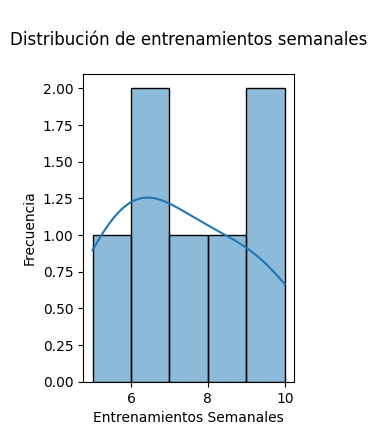


 Atleta: Variable categórica - nominal 


 Edad: Variable cuantitativa - discreta 


 Altura_cm: Variable cuantitativa - continua 


 Peso_kg: Variable cuantitativa - continua 


 Deporte : Variable categórica - nominal 


 Entrenamientos_Semanales: Variable cuantitativa - discreta 


 Medallas_Totales: Variable cuantitativa - discreta 


 Pais: Variable categórica - nominal 

--------------------------------------------------------------------

 Media de la cantidad de medallas obtenidas: 8.57


 Mediana de la cantidad de medallas obtenidas: 7.0 


 Moda de la cantidad de medallas obtenidas: 0     3
1     4
2     5
3     7
4     8
5    10
6    23
Name: Medallas_Totales, dtype: int64 


 Desviación estándar de la altura de los atletas: 18.72



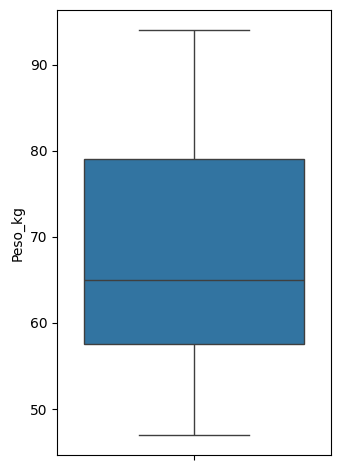


 No se identificaron outliers en la columna peso 

Correlación de Pearson: 0.57
Existe una correlación positiva moderada (r=0.57) entre los entrenamientos semanales y el número de medallas totales


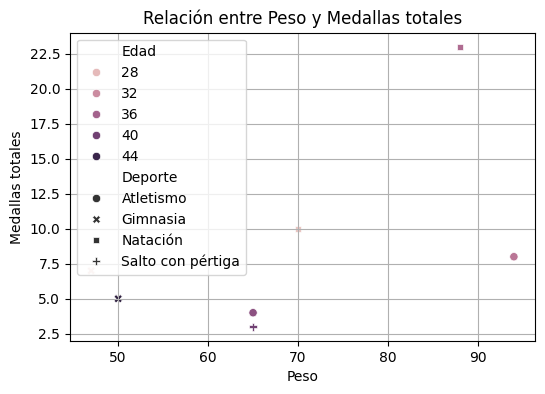


La relación entre el peso y las medallas totales no es clara visualmente. Se observa que algunos atletas con mayor peso han obtenido más medallas, pero también existen excepciones. Podría existir una correlación positiva leve, aunque la dispersión indica que el peso, no es el único factor que explica las medallas ganadas.

Intercepto (beta_0): -7.125
Coeficiente (beta_1): 2.1544117647058822
[ 5.80147059 14.41911765 12.26470588 10.11029412  7.95588235  5.80147059
  3.64705882]


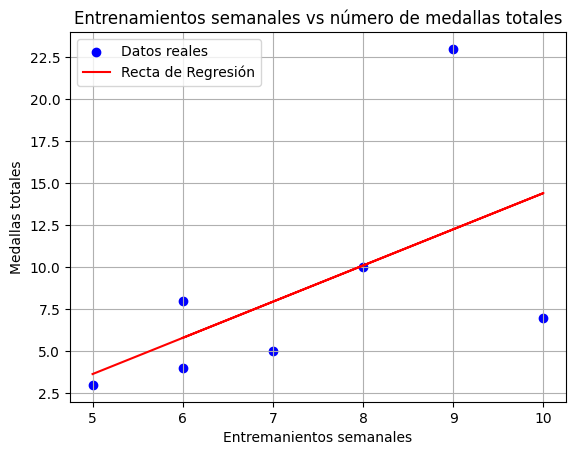


 Interpretación: 


 La pendiente positiva de la línea roja indica que existe una relación positiva, entre la cantidad de entrenamientos semanales y el número de medallas totales. La línea roja no pasa exactamente por todos los puntos, porque intenta ajustarse lo mejor posible a todos los datos. Los puntos que están lejos de la línea representan casos que no siguen perfectamente la tendencia, esto indica que la cantidad de entrenamientos semanales no es el único factor que determina el número de medallas. Hay otros elementos (como el talento, la dieta, el descanso o el tipo de deporte) que también influyen en el resultado y que no están representados en este modelo.

Coeficiente de determinación R²:0.32
Los entrenamientos semanales sí influyen en las medallas, pero solo explican un 32 % de lo que pasa, el resto depende de otras cosas


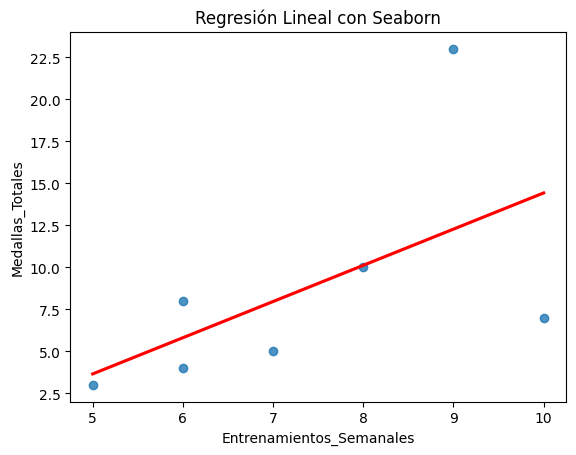

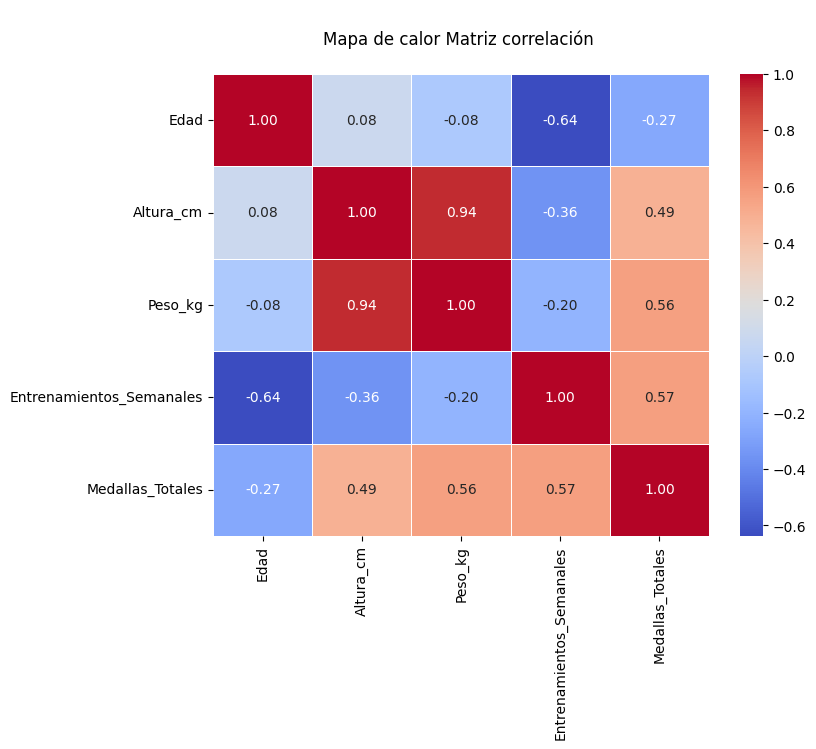


Sí, existe una correlación entre los entremientos semanales y las madallas totales. Se identifica una correlación positiva de intesidad moderada. Se puede concluir que, en promedio, a medida que los atletas entrenan más veces por semana, tienden a obtener un mayor número de medallas. Sin embargo, la correlación no es fuerte como para afirmar que los entrenamientos semanales son el único factor determinante.



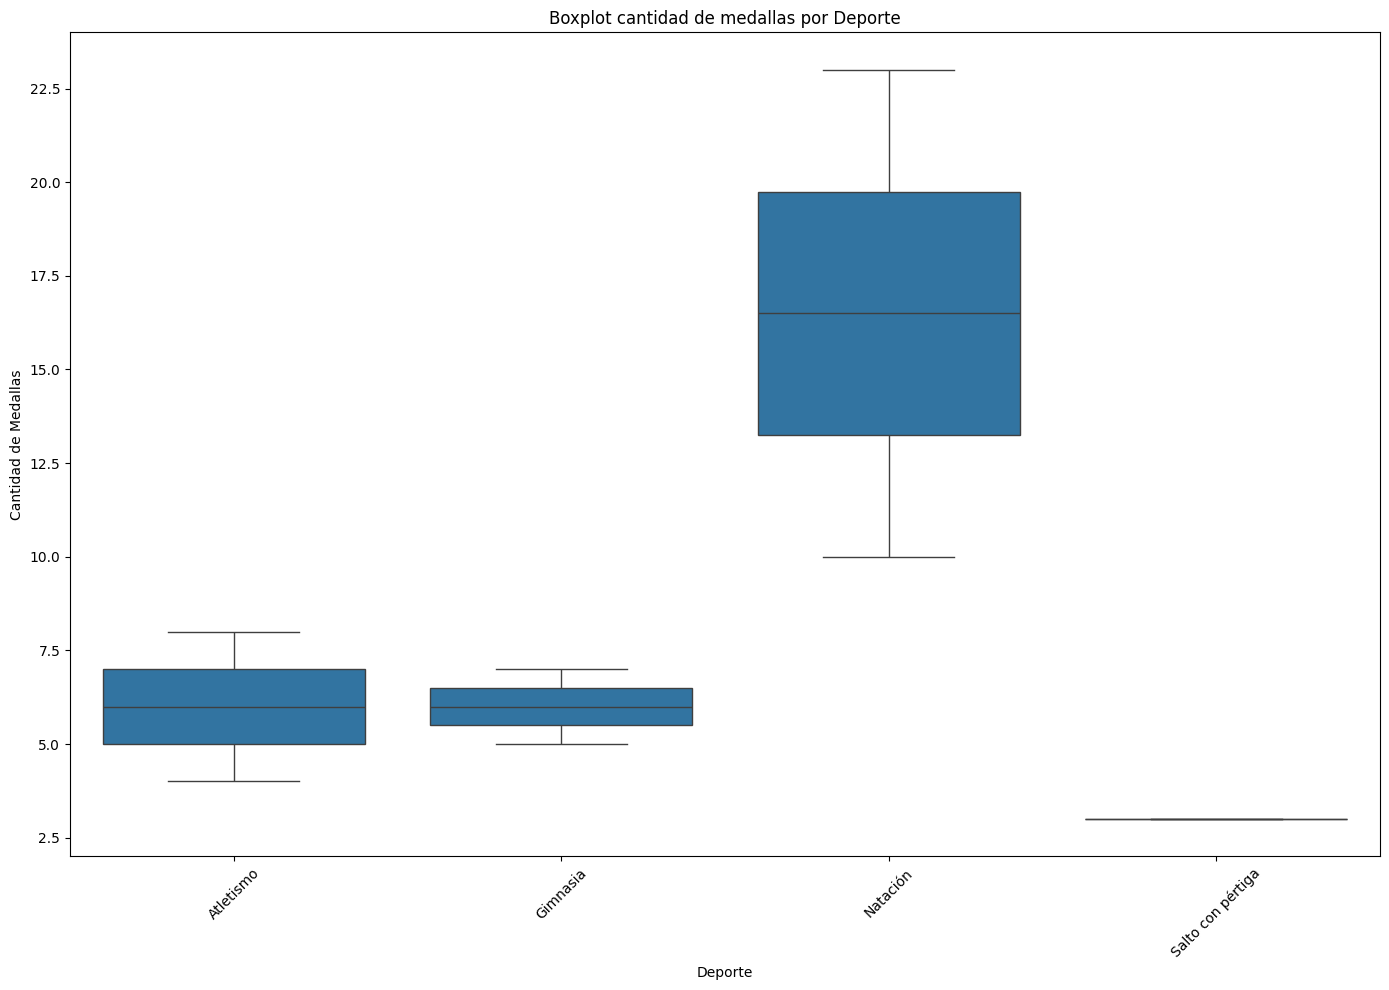

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

df = pd.read_csv("olimpicos.csv")

print("\n Dataset original: \n")
print(df)
print(("\n Valores Nulos: \n"))
print(df.isna())
print(("\n Suma valores nulos: \n"))
print(df.isna().sum())
print("\n No se encuentran valores nulos en el dataset. \n")
print("\n 5 primeras filas del dataset: \n")
print(df.head())
print("\n Resumen estadístico: \n")
print(df.describe())

# Genera un histograma del número de entrenamientos semanales.
plt.figure(figsize=(6,4)) # Tamaño de figura matplotlib
plt.subplot(1,2,1)
sns.histplot(df['Entrenamientos_Semanales'], bins=5, kde=True) #asignación de ejes
plt.title('\nDistribución de entrenamientos semanales\n') #titulo
plt.xlabel('Entrenamientos Semanales') #  titulo eje x
plt.ylabel('Frecuencia') # titulo eje y
plt.show()

print("\n Atleta: Variable categórica - nominal \n")
print("\n Edad: Variable cuantitativa - discreta \n")
print("\n Altura_cm: Variable cuantitativa - continua \n")
print("\n Peso_kg: Variable cuantitativa - continua \n")
print("\n Deporte : Variable categórica - nominal \n")
print("\n Entrenamientos_Semanales: Variable cuantitativa - discreta \n")
print("\n Medallas_Totales: Variable cuantitativa - discreta \n")
print("\n Pais: Variable categórica - nominal \n")
print("--------------------------------------------------------------------")


print(f"\n Media de la cantidad de medallas obtenidas: {df['Medallas_Totales'].mean():.2f}\n")

print(f"\n Mediana de la cantidad de medallas obtenidas: {df['Medallas_Totales'].median()} \n")


print(f"\n Moda de la cantidad de medallas obtenidas: {df['Medallas_Totales'].mode()} \n")


print(f"\n Desviación estándar de la altura de los atletas: {df['Altura_cm'].std():.2f}\n")

#Identifica valores atípicos en la columna de peso utilizando un boxplot.
plt.subplot(1,2,2)
sns.boxplot(y=df['Peso_kg'])
plt.ylabel('Peso_kg')
plt.tight_layout()
plt.show()
print("\n No se identificaron outliers en la columna peso \n")

# Análisis de Correlación
#Calcula la correlación de Pearson entre entrenamientos semanales y medallas totales.

corr_pearson= df['Entrenamientos_Semanales'].corr(df['Medallas_Totales'], method='pearson')
print(f"Correlación de Pearson: {corr_pearson:.2f}")
print("Existe una correlación positiva moderada (r=0.57) entre los entrenamientos semanales y el número de medallas totales")

#Crea un gráfico de dispersión (scatterplot) entre peso y medallas totales con Seaborn.

plt.figure(figsize=(6,4))
sns.scatterplot(x="Peso_kg", y="Medallas_Totales", data=df, hue="Edad",style="Deporte")
plt.title('Relación entre Peso y Medallas totales')
plt.xlabel('Peso')
plt.ylabel('Medallas totales')
plt.grid(True)
plt.show()
print('\nLa relación entre el peso y las medallas totales no es clara visualmente. Se observa que algunos atletas con mayor peso han obtenido más medallas, pero también existen excepciones. Podría existir una correlación positiva leve, aunque la dispersión indica que el peso, no es el único factor que explica las medallas ganadas.\n')

#Explica si existe correlación entre estas variables.

#4.Regresión Lineal (2 puntos)
#Implementa un modelo de regresión lineal para predecir el número de medallas obtenidas en función del número de entrenamientos semanales.

X= df[['Entrenamientos_Semanales']] # X siempre debe ser 2D
y= df['Medallas_Totales']

#Crear y entrenar el modelo de regresión.
modelo = LinearRegression()
modelo.fit(X,y)
#Obtener los coeficientes

beta_0= modelo.intercept_ #Intercepto
beta_1 = modelo.coef_[0]  #Coeficiente

print(f"Intercepto (beta_0): {beta_0}")
print(f"Coeficiente (beta_1): {beta_1}")

#Precedir, usando el modelo.

medallas_pred = modelo.predict(X)
print(medallas_pred)

#Graficar la regresión.
plt.scatter(X, y, color='blue',label='Datos reales')
plt.plot(X, medallas_pred, color='red', label='Recta de Regresión')
plt.title('Entrenamientos semanales vs número de medallas totales')
plt.xlabel("Entremanientos semanales")
plt.ylabel("Medallas totales")
plt.legend()
plt.grid(True)
plt.show()
print("\n Interpretación: \n")
print("\n La pendiente positiva de la línea roja indica que existe una relación positiva, entre la cantidad de entrenamientos semanales y el número de medallas totales. La línea roja no pasa exactamente por todos los puntos, porque intenta ajustarse lo mejor posible a todos los datos. Los puntos que están lejos de la línea representan casos que no siguen perfectamente la tendencia, esto indica que la cantidad de entrenamientos semanales no es el único factor que determina el número de medallas. Hay otros elementos (como el talento, la dieta, el descanso o el tipo de deporte) que también influyen en el resultado y que no están representados en este modelo.\n")

#Calcula el R² para medir el ajuste del modelo.

r2 = r2_score(y,medallas_pred)
print(f"Coeficiente de determinación R²:{r2:.2f}")
print("Los entrenamientos semanales sí influyen en las medallas, pero solo explican un 32 % de lo que pasa, el resto depende de otras cosas")

#Usa Seaborn (regplot) para graficar la regresión lineal.

#Gráfico con Seaborn
sns.regplot(x='Entrenamientos_Semanales', y='Medallas_Totales', data=df, ci=None, line_kws={"color":"red"})
plt.title("Regresión Lineal con Seaborn")
plt.show()

#Visualización de Datos con Seaborn y Matplotlib (2 puntos)
#Crea un heatmap de correlación entre todas las variables numéricas.

df_num= df.select_dtypes(include=np.number)
matriz_corr = df_num.corr()

plt.figure(figsize=(8,6))
sns.heatmap(matriz_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('\nMapa de calor Matriz correlación \n')
plt.show()
print('\nSí, existe una correlación entre los entremientos semanales y las madallas totales. Se identifica una correlación positiva de intesidad moderada. Se puede concluir que, en promedio, a medida que los atletas entrenan más veces por semana, tienden a obtener un mayor número de medallas. Sin embargo, la correlación no es fuerte como para afirmar que los entrenamientos semanales son el único factor determinante.\n')

#Crea un boxplot de la cantidad de medallas por disciplina deportiva.
#Personaliza los gráficos con títulos, etiquetas y colores.

plt.figure(figsize=(14,10))
sns.boxplot(x="Deporte", y="Medallas_Totales", data=df)
plt.xticks(rotation=45)
plt.title("Boxplot cantidad de medallas por Deporte")
plt.ylabel("Cantidad de Medallas")
plt.xlabel("Deporte")
plt.tight_layout()
plt.show()
